# <center>Прогнозирование временного ряда
</center>

## <center>Входные данные
</center>

### У нас имеются данные телеметрии производственного процесса
Пример датасета:

In [24]:
name_file = 'ADS8472365955645598497_flatten.csv'
define_index_col ='cur_ts'
separator = ','
data = pd.read_csv(name_file,sep=separator, index_col=define_index_col, parse_dates=[define_index_col], dayfirst=False)
data.columns = list(range(1,30)) + ['target_var']
data.head(5)


#изменить таргет

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,taget_var
cur_ts,,,,,,,,,,,,,,,,,,,,,
2017-11-23 04:00:00,769.23901,1.85941,0.00813,5.90020,0.0,6.93544,18491.29116,3.99985,89.99428,0.0,...,64.99238,512.04050,32.0,5.91583,30.83155,18825.55548,187.22773,253.20341,211.34052,2.88
2017-11-23 06:00:00,769.81196,1.85634,0.00813,5.88289,0.0,6.92428,18470.35126,4.00130,90.04747,0.0,...,65.00468,511.94556,32.0,5.91588,30.82983,18916.79053,187.26999,253.26852,211.31157,2.90
2017-11-23 08:00:00,770.64224,1.86289,0.00813,5.96244,0.0,6.99708,18330.01439,3.99854,89.99650,0.0,...,65.02140,511.94831,32.0,5.90487,30.82846,19172.33189,187.09417,253.34032,211.29926,3.05
2017-11-23 10:00:00,772.07366,1.89989,0.00813,6.02975,0.0,7.05554,18265.38784,4.00235,90.06770,0.0,...,65.01550,511.96176,32.0,5.88597,30.87178,19349.68907,186.89291,253.43547,211.29201,3.07
2017-11-23 12:00:00,771.15140,1.91538,0.00813,6.07950,0.0,7.07766,18263.54013,4.01509,89.67849,0.0,...,65.01123,512.01537,32.0,5.88026,31.03888,19395.28530,186.21403,253.19235,211.30563,3.03


### Необходимо прогнозировать параметр target_var, основываясь на имеющихся данных. 

#### Что уже сделано? 
<p>1) Проведена предобработка данных: </p>
<p>a. Данные очищены от выбросов </p>
<p>b. Данные подвержены трансформации Бокса-Кокса </p> 
<p>c. Добавлены лаговые переменные </p>
<p>d. Дополнительно, по каждому из тегов(экзогенные переменные) считаем три статистические характеристики: медиана, среднее и эксес. Получившиеся значения рассматриваем как признаки для нашего временного ряда.</p>
<p>d. Выполнен корреляционный анализ </p>
<p>2) Применены следующие модели: ARIMA(с экзогенными переменными), градиентный бустинг, RNN(LSTM), MLP </p>
<p>Было выявлено, что ряд стационарный, не имеет ни тренда, ни сезона, ни цикла. Результаты всех моделей колеблятся в районе от R^2 = 57% до R^2 = 65% </p>

<p>Во всех моделях наблюдается запаздывание прогноза на один шаг. </p>
К примеру, на графике видно, что красная линия(предсказанные значения) запаздывает на один шаг.

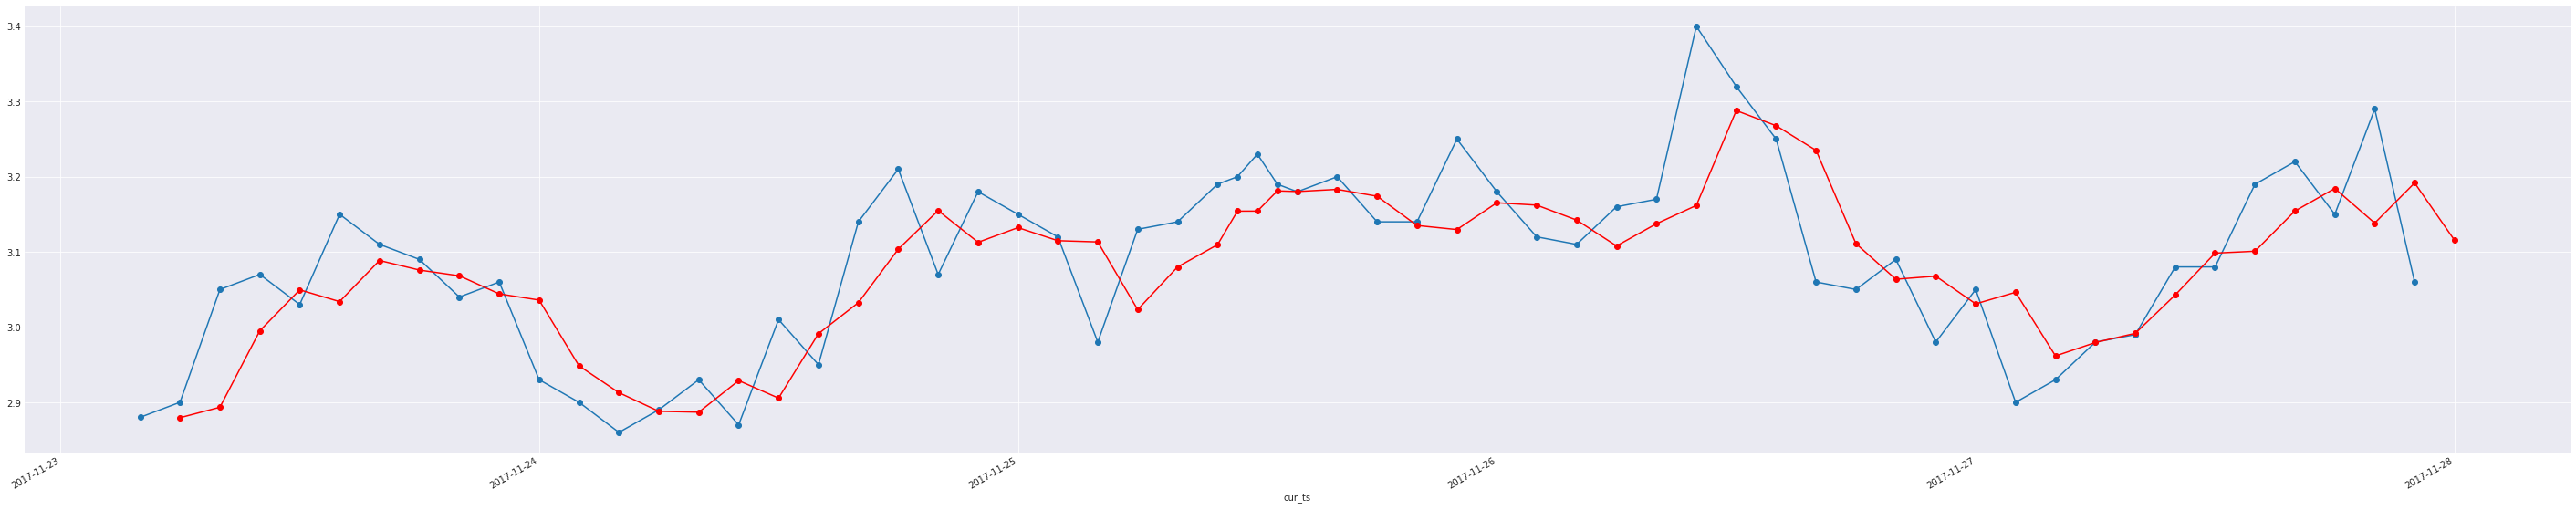

In [143]:
plt.figure(figsize=(50,10))
data.iloc[0:60, 4].plot(style='-o')
test_dynamic_prediction.plot(color='r', style='-o')
plt.show()

### Если сдвинуть предсказание на одну точку назад, то R^2 резко увеличивается, достигает 90-95 % и картина будет следующей:

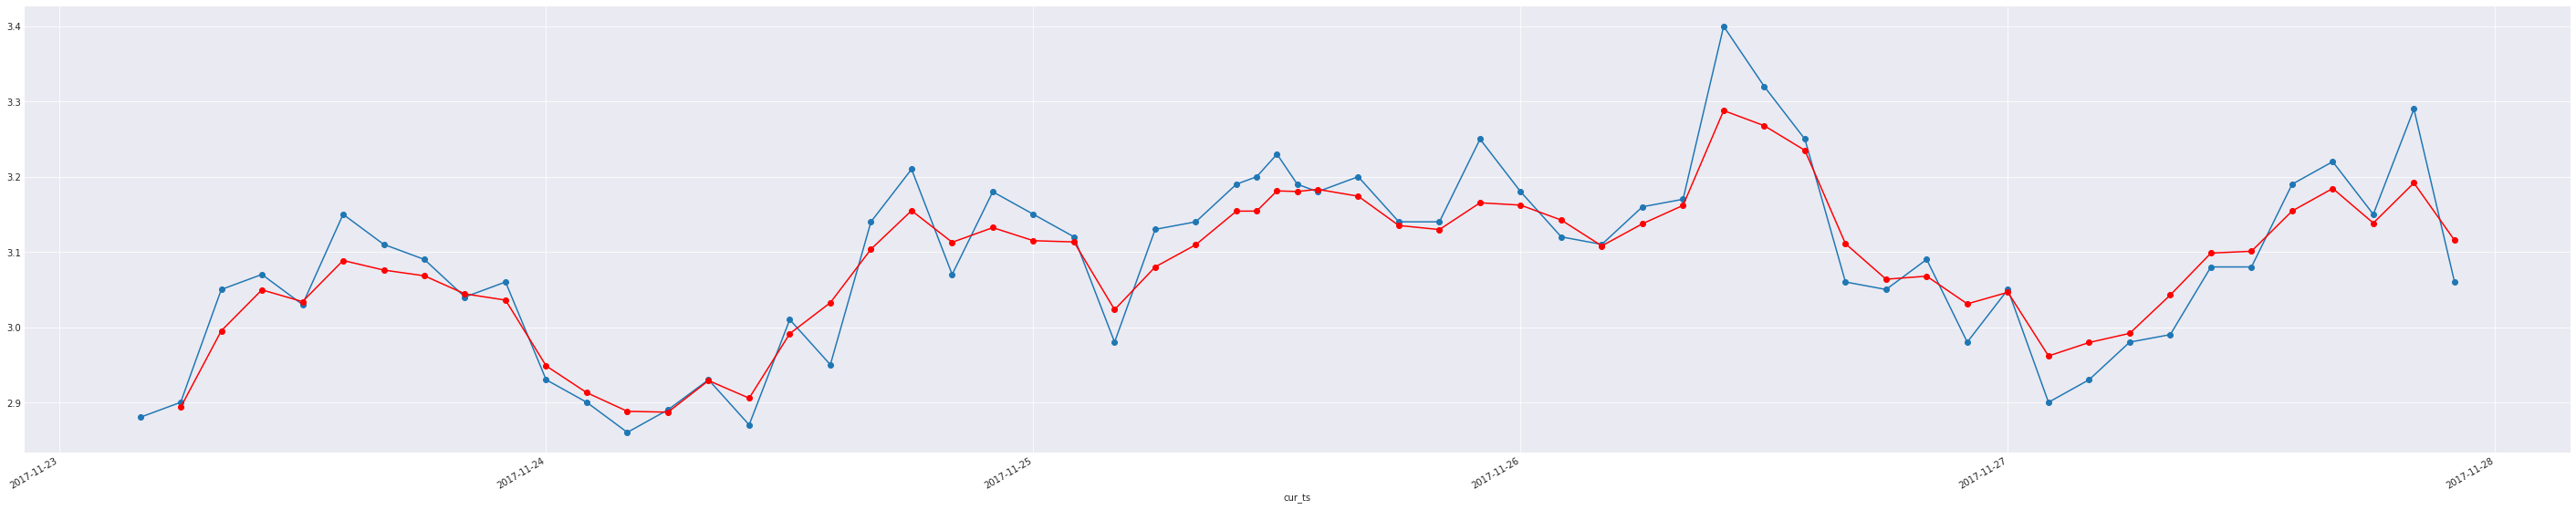

In [144]:
plt.figure(figsize=(50,10))
data.iloc[0:60, 4].plot(style='-o')
test_dynamic_prediction.shift(-1).plot(color='r', style='-o')
plt.show()

### Вопросы

<p>У нас главная проблема в том, что наблюдается запаздывание прогнозирования.</p>
<p>1) Какие способы борьбы с этим можете посоветовать ?</p>
<p>2) Что нового можно ещё попробовать ?</p>
<p>3) В какую сторону стоит копать ?</p>
